In [1]:
import os
root = os.path.join('..')
data_root = os.path.join(root, 'data')
dataset_root = os.path.join(root, '..', 'datasets')
fig_root = os.path.join(root, 'figs')

In [2]:
import sys
sys.path.append(root)

In [3]:
from typing import Any, Dict, Tuple, Type, Union

import torch

from utils.fig import Axes, Figure
from utils.interfaces import ResultsRealAlongLrs, ResultsSyntheticAlongLrs

In [4]:
Figure.set_seaborn_theme()
Figure.set_tex()
Figure.set_high_dpi()

In [5]:
def embed_graph(
    ax: Axes,
    result_class: Type[Union[ResultsSyntheticAlongLrs, ResultsRealAlongLrs]],
    orig_kwargs: Dict[str, Any], 
    keys: Tuple[str, ...],
    x2d: Tuple[Tuple[float, ...], ...], 
    xlabel: str,
) -> None:
    assert len(keys) == len(x2d)
    n = len(x2d[0])
    for x1d in x2d[1:]:
        assert len(x1d) == n
    
    accs = []
    cossims = []
    for i in range(n):
        kwargs = orig_kwargs.copy()
        for j, key in enumerate(keys):
            kwargs[key] = x2d[j][i]
        kwargs.update({'data_root': data_root, 'device': torch.device('cpu')})
        r = result_class(**kwargs)
        accs.append(r.acc)
        cossims.append(r.cossim)

    xticks = x2d[0]
    ax.line(xticks, accs, label='Standard training accuracy', marker='o')
    ax.line(xticks, cossims, label='Cosine similarity', marker='X', linestyle='--')
    ax.set_xticks(xticks)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlabel(xlabel)

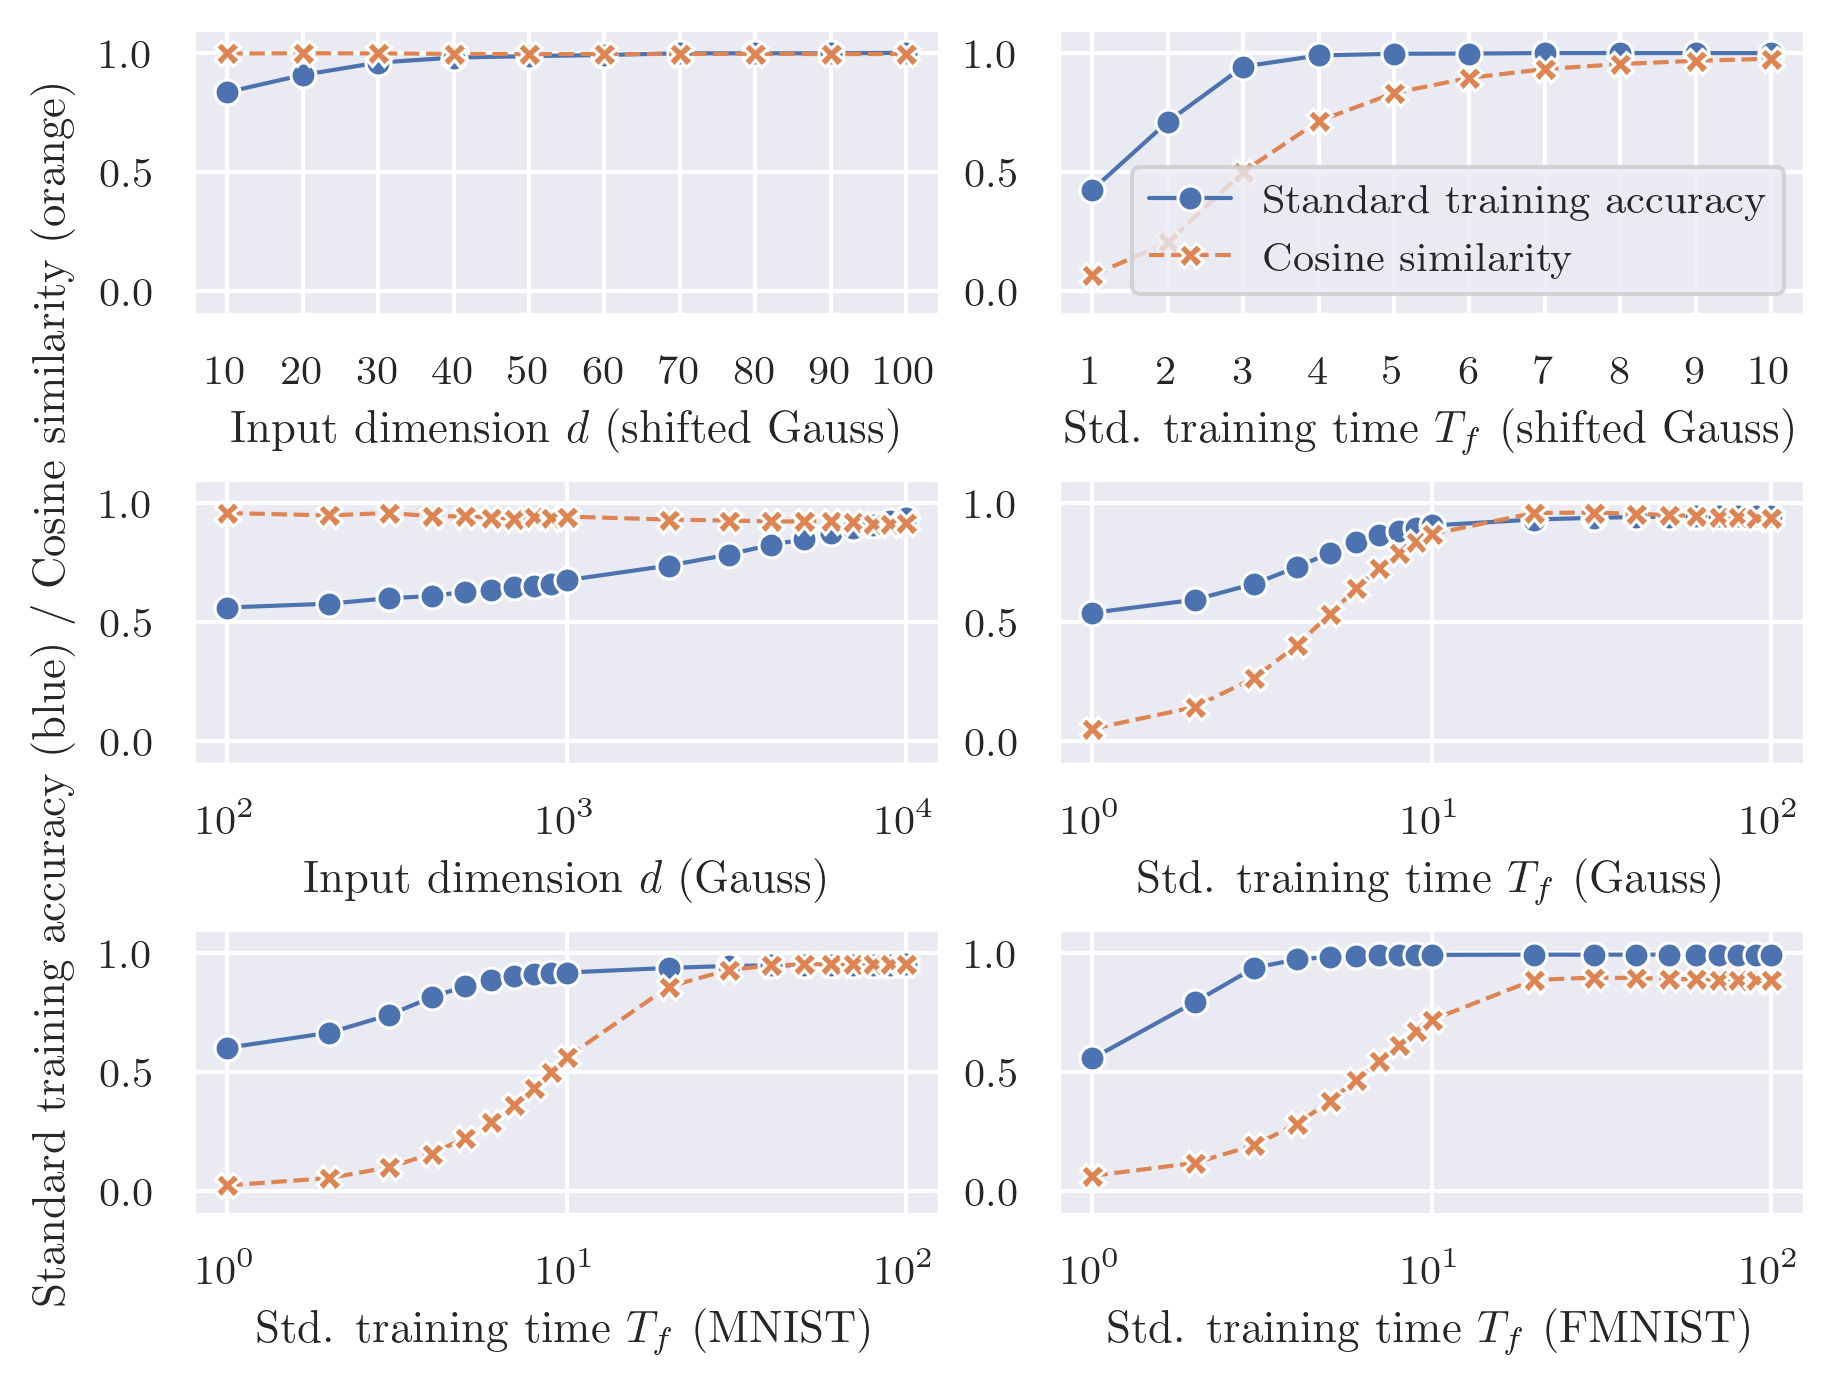

In [6]:
Figure.set_font_scale(.9)
f = Figure(3, 2, (6, 1.5*3))
f.set_supylabel('Standard training accuracy (blue) / Cosine similarity (orange)')

kwargs = {
    'in_dim': 100,
    'hidden_dim': 100,
    'slope': 0.,
    'loss_name': 'identity',
    'epochs_1': 1000,
    'epochs_2': 1000,
    'perturbation_size': .01,
    'seed': 0,
    'on_original': False,
    'lrs_1': (1., .1),
    'lrs_2': (1., .1),
    'data_gen_method': 'shifted_gauss',
    'n_sample': 1000,
}
result_class = ResultsSyntheticAlongLrs
in_dims = (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
perturbation_sizes = (.0031, .0044, .0054, .0063, .007, .0077, .0083, .0089, .0094, .01)
embed_graph(f.axes[0][0], result_class, kwargs, ('in_dim', 'perturbation_size'), (in_dims, perturbation_sizes), r'Input dimension $d$ (shifted Gauss)')
kwargs['lrs_1'] = (.1,)
epochs_1s = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
embed_graph(f.axes[0][1], result_class, kwargs, ('epochs_1',), (epochs_1s,), r'Std. training time $T_f$ (shifted Gauss)')
f.axes[0][1].legend()

kwargs = {
    'in_dim': 10000,
    'hidden_dim': 100,
    'slope': 0.,
    'loss_name': 'identity',
    'epochs_1': 1000,
    'epochs_2': 1000,
    'perturbation_size': .1,
    'seed': 0,
    'on_original': False,
    'lrs_1': (1., .1),
    'lrs_2': (1., .1),
    'data_gen_method': 'gauss',
    'n_sample': 10000,
}
result_class = ResultsSyntheticAlongLrs
in_dims = (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000)
perturbation_sizes = (.01, .014, .017, .02, .022, .024, .026, .028, .03, .031, .044, .054, .063, .07, .077, .083, .089, .094, .1)
embed_graph(f.axes[1][0], result_class, kwargs, ('in_dim', 'perturbation_size'), (in_dims, perturbation_sizes), r'Input dimension $d$ (Gauss)')
f.axes[1][0].set_xlogscale()
kwargs['lrs_1'] = (.1,)
epochs_1s = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
embed_graph(f.axes[1][1], result_class, kwargs, ('epochs_1',), (epochs_1s,), r'Std. training time $T_f$ (Gauss)')
f.axes[1][1].set_xlogscale()

kwargs = {
    'hidden_dim': 100,
    'slope': 0.,
    'loss_name': 'identity',
    'epochs_1': 100,
    'epochs_2': 100,
    'perturbation_size': .14,
    'seed': 0,
    'on_original': False,
    'lrs_1': (.01, .001),
    'lrs_2': (.01, .001),
    'dataset_name': 'MNIST',
    'dataset_root': dataset_root,
}
result_class = ResultsRealAlongLrs
epochs_1s = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
embed_graph(f.axes[2][0], result_class, kwargs, ('epochs_1',), (epochs_1s,), r'Std. training time $T_f$ (MNIST)')
f.axes[2][0].set_xlogscale()

kwargs = {
    'hidden_dim': 100,
    'slope': 0.,
    'loss_name': 'identity',
    'epochs_1': 100,
    'epochs_2': 100,
    'perturbation_size': .14,
    'seed': 0,
    'on_original': False,
    'lrs_1': (.01, .001),
    'lrs_2': (.01, .001),
    'dataset_name': 'FMNIST',
    'dataset_root': dataset_root,
}
result_class = ResultsRealAlongLrs
epochs_1s = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
embed_graph(f.axes[2][1], result_class, kwargs, ('epochs_1',), (epochs_1s,), r'Std. training time $T_f$ (FMNIST)')
f.axes[2][1].set_xlogscale()

f.save(fig_root, 'cossim.pdf')
f.show()
f.close()